In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Model and Linear Version

### Normal Model (non linear)

$f(I) = (b_0 + \frac{b_1}{1+(b_2 I)^{b_3}})$

&nbsp;

$\dot{A} = f(I)A - k_1 A$

$\dot{I} = k_2 A - k_3 I$

### Linear Version

$\dot{A} = v_1 I A + v_0 A - k_1 A$

$\dot{I} = k_2 A - k_3 I$

&nbsp;

Let $v_1$ be $ (multiple values could work but this one always will.

Let $v_0 = -v_1 f^{-1}(k_1) + k_1$

&nbsp;

From this linear version we see $f(I)$ is substituted for $v_1 I + v_0$

We can show that the linear model is less than the normal when $f(I) > k_1$ and greater than when $f(I) < k_1$. 

When $f(I) > k_1$:

$f(I) < v_1 I + v_1 k_1 + f(k_1)$

$f(I) < v_1 (I + k_1) + f(k_1)$


0.8069312983651263


Text(0, 0.5, 'f(I)')

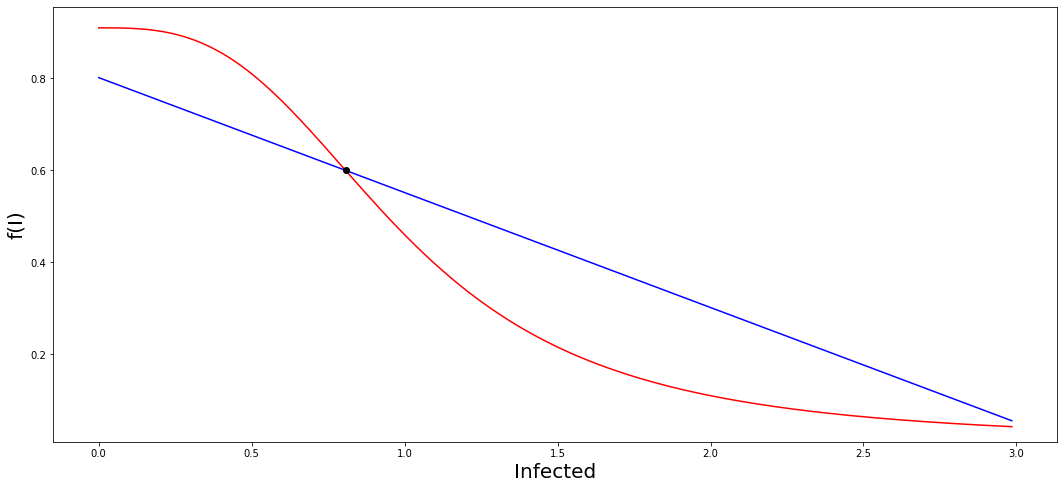

In [143]:
def feedFunc(I, b0, b1, b2, b3):
    return b0 + (b1 / (1 + (b2*I)**b3))

def feedFuncInverse(y, b0, b1, b2, b3): #solve for I in f(I), if y = f(I), this is I = f^-1(y)
    return (((b1/(y - b0)) - 1)/b2)**(1/b3)

def feedFuncDeriv(I, b0, b1, b2, b3): #f'(I), note b0 actually has no importance
    return (b1*b3*((b2*I)**b3)) / (I*(1 + (b2*I)**b3)**2)

maxI = 3
xData = np.arange(0, maxI, maxI/200)

bVars = [.01, .9, 1, 3]
k_1 = .6

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(xData, feedFunc(xData, bVars[0], bVars[1], bVars[2], bVars[3]), color="red")


#temp1 = -((bVars[3]-1)/((bVars[3]+1)*bVars[2]))**(1/bVars[3]) #the x position of the minimum slope of f(I)
#v_1 = feedFuncDeriv(temp1, bVars[0], bVars[1], bVars[2], bVars[3])
#print(v_1)
#v_0 = -v_1*feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]) + k_1

v_1 = -.25
v_0 = -v_1*feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]) + k_1

ax.plot(xData, xData*v_1+v_0, color="blue")
ax.plot(feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]), k_1, color="black", marker='o')

print(feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]))

ax.set_ylim([.97*bVars[0], 1.05*(bVars[0]+bVars[1])])

ax.set_xlabel("Infected", fontsize=20)
ax.set_ylabel("f(I)", fontsize=20)

### Cut out some parameters by substitution

Let $A = \frac{y}{v_1 k_2}$

Let $I = \frac{x}{v_1}$

&nbsp;

After substitution in the normal model we get:

$\dot{y} = f(\frac{x}{v_1})y - k_1 y$

$\dot{x} = y - k_3 x$

&nbsp;

After substitution in the linear model we get:

$\dot{y} = xy - k_1 y + v_0 y$

$\dot{x} = y - k_3 x$

or by using what $v_0$ is equal to:

$\dot{y} = xy - v_1 f^{-1}(k_1) y$

$\dot{x} = y - k_3 x$

Based on this, the only parameters to be concerned with are those within $f(I)$ and $k_1, k_3,$ and $v_1$

Lastly note that both of these systems are stable when $x = v_1 f^{-1}(k_1)$, and $y = k_3x$

x stable:  -0.008792288628589232


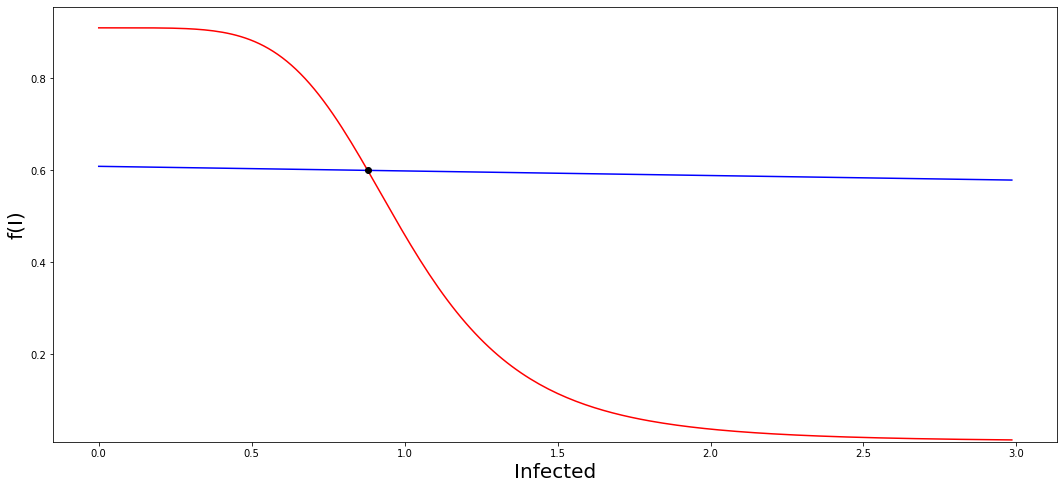

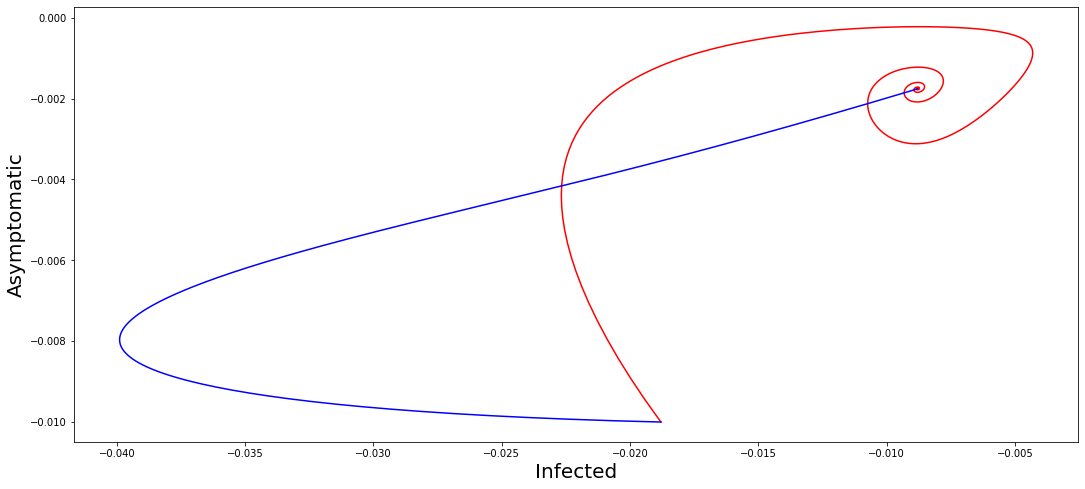

In [166]:
def odeDrawerNormal(start, time, p, speed=.1): #using the equations, p = [v_1, k_1, k_3, b0, b1, b2, b3]
    y = np.zeros(time)
    x = np.zeros(time)
    y[0] = start[1]
    x[0] = start[0]
    for i in range(1, time): #just iterate equations
        yDot = feedFunc(x[i-1]/p[0], p[3], p[4], p[5], p[6])*y[i-1] - p[1]*y[i-1]
        xDot = y[i-1] - p[2]*x[i-1]
        y[i] = speed*yDot + y[i-1]
        x[i] = speed*xDot + x[i-1]
    return x,y
    
def odeDrawerLinear(start, time, p, speed=.1): #using the equations, params = [v_1, k_1, k_3, b0, b1, b2, b3]
    y = np.zeros(time)
    x = np.zeros(time)
    y[0] = start[1]
    x[0] = start[0]
    #print(p[0]*feedFuncInverse(p[1], p[3], p[4], p[5], p[6]))
    for i in range(1, time): #just iterate equations
        yDot = x[i-1]*y[i-1] - p[0]*feedFuncInverse(p[1], p[3], p[4], p[5], p[6])*y[i-1]
        xDot = y[i-1] - p[2]*x[i-1]
        y[i] = speed*yDot + y[i-1]
        x[i] = speed*xDot + x[i-1]
    return x,y

bVars = [.01, .9, 1, 5]

v_1 = -.01 # Focus on this parameter the slope of the linear version
k_1 = .6
k_3 = .2
params = [v_1, k_1, k_3, bVars[0], bVars[1], bVars[2], bVars[3]]

xStable = params[0]*feedFuncInverse(params[1], params[3], params[4], params[5], params[6])
print("x stable: ", xStable)


### Graph feedback curve

fig, ax = plt.subplots(figsize=(18,8))

ax.plot(xData, feedFunc(xData, bVars[0], bVars[1], bVars[2], bVars[3]), color="red") #non linear model

v_0 = -v_1*feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]) + k_1

ax.plot(xData, xData*v_1+v_0, color="blue") #linear model

ax.plot(feedFuncInverse(k_1, bVars[0], bVars[1], bVars[2], bVars[3]), k_1, color="black", marker='o')

ax.set_ylim([.97*bVars[0], 1.05*(bVars[0]+bVars[1])])

ax.set_xlabel("Infected", fontsize=20)
ax.set_ylabel("f(I)", fontsize=20)


### Graph P-Plane
fig2, ax2 = plt.subplots(figsize=(18,8))

ax2.set_ylabel("Asymptomatic", fontsize=20)
ax2.set_xlabel("Infected", fontsize=20)

startPoint = [xStable - .01, -0.01]

x,y = odeDrawerNormal(startPoint, 10000, params, speed=.1)
ax2.plot(x,y, color="red") #non linear model
x,y = odeDrawerLinear(startPoint, 10000, params, speed =.1)
ax2.plot(x,y, color="blue") #linear model